In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

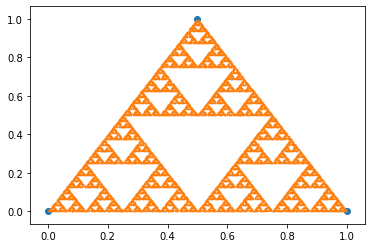

In [2]:
# sierpinksi triangle
n_points = 30000
domain = (1, 1)

#vertices
points = np.asarray([[0, 0], [0.5, 1], [1, 0],  [0.5, 0.5]])

for i in range(n_points):
    rand = np.random.randint(0, 3)
    points = np.append(points, [(points[rand] + points[i + 3]) / 2], axis=0)

plt.scatter(points[:3, 0], points[:3, 1])
plt.scatter(points[3:, 0], points[3:, 1], s=0.1)

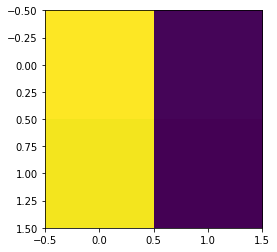

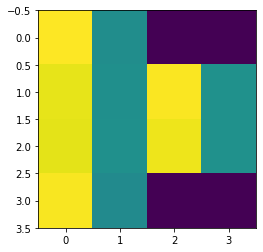

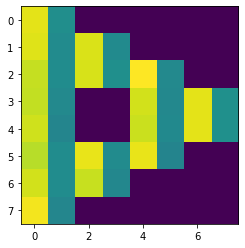

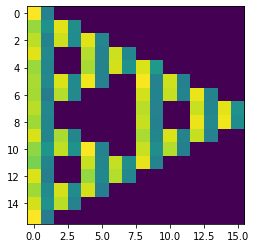

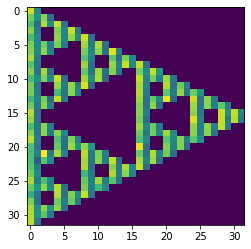

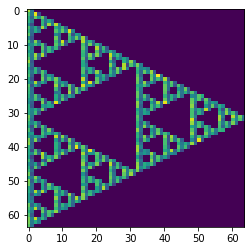

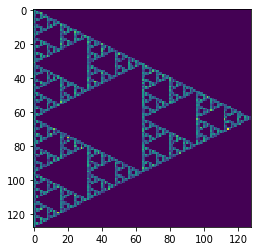

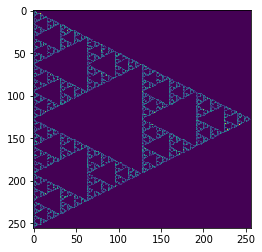

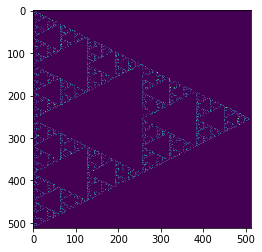

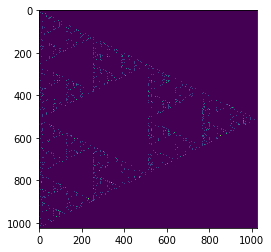

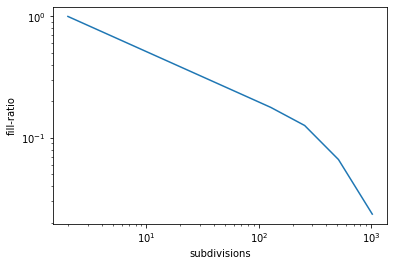

In [3]:
# dimension determination of sierpinksi trianagle
ratios = []
bins = []

for i in range(10):
    nbins = 2**(i + 1)
    bins.append(nbins)
    
    counts, binsx, binsy = np.histogram2d(points[:,0], points[:,1], bins=nbins)
    plt.imshow(counts)
    plt.show()
    numfilled = np.sum(counts > 0)
    ratio = numfilled / (nbins ** 2)
    ratios.append(ratio)
    
bins = np.asarray(bins)
ratios = np.asarray(ratios)
plt.plot(bins, ratios)
plt.xlabel('subdivisions')
plt.ylabel('fill-ratio')
plt.xscale('log')
plt.yscale('log')

# the linearity depends on the resolution so having a longer iteration will give a longer linear region

In [4]:
x = np.log(bins)
y = np.log(ratios)

b, m = np.polynomial.polynomial.polyfit(x, y, 1)

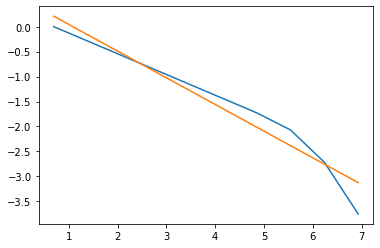

In [5]:
plt.plot(x, y)
plt.plot(x, x * m + b)

In [6]:
dimension_sierpinksi = 2 + m
print(dimension_sierpinksi)

1.465724589809033


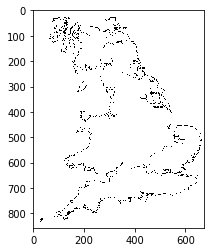

In [7]:
# British coastline
imgraw = plt.imread("coastline.png")
imgraw.shape
plt.imshow(imgraw)

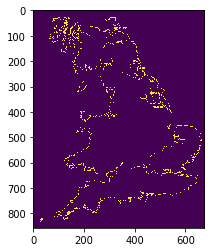

In [8]:
coast = (imgraw[..., :].dot([0.299, 0.587, 0.114]) < 0.3) * 1
plt.imshow(coast)

In [22]:
def boxcount(arr, bins):
    
    xdim = arr.shape[0]
    ydim = arr.shape[1]
    
    hx = xdim / bins
    hy = ydim / bins
    
    filled = 0
    for i in range(bins):
        i0 = int(i * hx)
        i1 = int((i + 1) * hx)
        for j in range(bins):
            j0 = int(j * hy)
            j1 = int((j + 1) * hy)
            
            # view represents a box view of a small part of the image
            view = arr[i0:i1, j0:j1]
            
            # check if there are any array elements that are non-zero which indicates fills
            if view.size > 0 and np.max(view) > 0:
                filled += 1
    return filled / (bins ** 2)        
            

NameError: name 'coast' is not defined

In [ ]:
boxcount(coast, 100)

In [10]:
ratios = []
bins = []
for i in range(10):
    nbins = 2 ** (i + 1)
    bins.append(nbins)
    ratios.append(boxcount(coast, nbins))

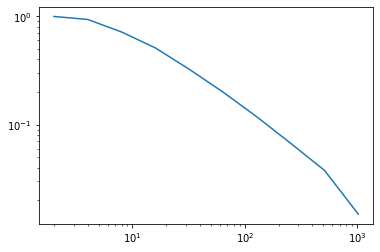

In [11]:
plt.plot(bins, ratios)
plt.xscale('log')
plt.yscale('log')

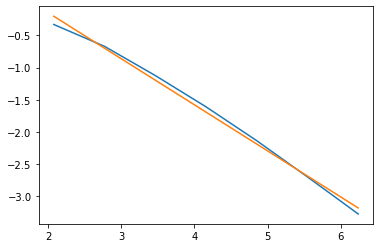

In [12]:
x = np.log(bins[2:9])
y = np.log(ratios[2:9])

b, m = np.polynomial.polynomial.polyfit(x, y, 1)
plt.plot(x, y)
plt.plot(x, x * m + b)

In [13]:
coastine_dim = 2 + m
print(coastine_dim)

1.2834888578824208


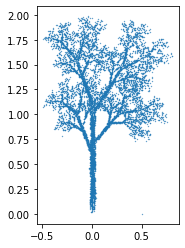

In [14]:
# self-similar object

coeffs = np.asarray([
    [
        [0.05, 0   , 0],
        [0.0 , 0.6 , 0]
    ],
    [
        [0.05, 0  , 0.0],
        [0.0 ,-0.5, 1.0]
    ],
    [
        [0.46,-0.15,0.0],
        [0.39,0.38,0.6]
    ],
    [
        [0.47,-0.15,0.0],
        [0.17, 0.42,1.1]
    ],
    [
        [ 0.43,0.28,0.0],
        [-0.25,0.45,1.0]
    ],
    [
        [ 0.42,0.26,0.0],
        [-0.35,0.31,0.7]
    ]
])

p = np.asarray([0.5, 0])
points = [p.copy()]

for _ in range(10000):
    prob = random.random()
    if prob < 0.1:
        case = 0
    elif prob < 0.2:
        case = 1
    elif prob < 0.4:
        case = 2
    elif prob < 0.6:
        case = 3
    elif prob < 0.8:
        case = 4
    else:
        case = 5
    
    p = np.matmul(coeffs[case], np.append(p, [1.0]))
    points.append(p.copy())

points = np.asarray(points).transpose()

plt.scatter(points[0], points[1], s=0.1)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
# basllistic
sites = 1024
nsteps = 100000

site_height = np.zeros((sites), dtype=int)
evolution = []
structure = np.zeros((sites, int(nsteps * 4 / sites)))

for t in range(nsteps):
    # store evolution from last time step
    evolution.append(site_height.copy())

    # identigy random site for deposition
    i = random.randrange(sites)
    
    # extract height of neighbors
    hl = site_height[(i - 1) % sites] 
    hr = h1 = site_height[(i + 1) % sites] 
    
    # apply deposition rule (2)
    if site_height[i] < hl and site_height[i] < hr:
        site_height[i] = max(hl, hr)
        structure[i, site_height[i]] = 1
    else:
        site_height[i] += 1

    structure[i, site_height[i]] = 1

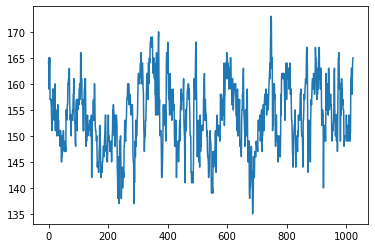

In [10]:
plt.plot(evolution[-1])

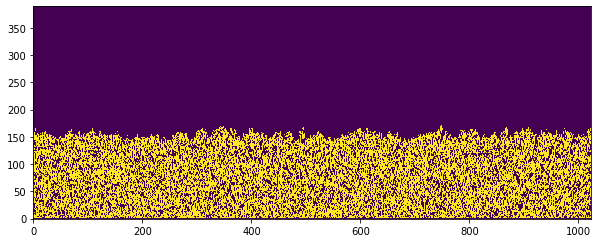

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(structure.transpose(), origin='lower')
plt.show()

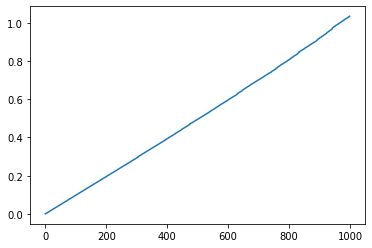

In [14]:
avgheight = np.sum(evolution, axis=1) / sites
plt.plot(avgheight[:1000])

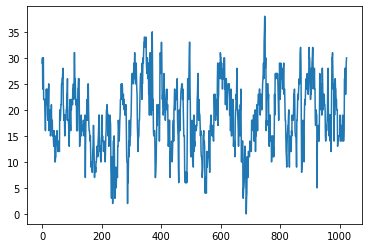

In [16]:
# normalize height
hnorm = evolution[-1] - np.min(evolution[-1])
plt.plot(hnorm)

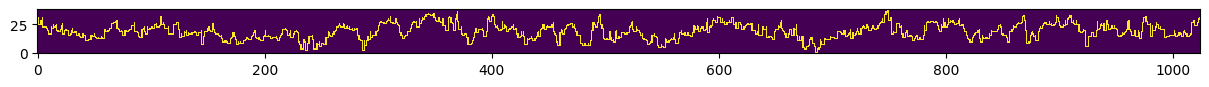

In [20]:
# convert the final structure to image format to reuse the box count algo
himg = np.zeros((sites, 1 + np.max(hnorm)))

for i, h in enumerate(hnorm):
    # to prevent gaps
    h_next = hnorm[(i + 1) % sites]
    h_prev = hnorm[(i - 1) % sites]
    
    if h > h_prev:
        himg[i, h_prev:h] = 1
    if h > h_next:
        himg[i, h_next:h] = 1
        
    himg[i, h] = 1
    
plt.figure(figsize = (15, 15), dpi=100)
plt.imshow(himg.transpose(), origin='lower')



In [21]:
ratios = []
bins = []
for i in range(1,9):
    nbins = 2**i
    bins.append(nbins)
    ratios.append(boxcount(himg,nbins))

NameError: name 'boxcount' is not defined